## Imports and functions

In [17]:
import networkx as nx #pip install networkx[default]
import matplotlib.pyplot as plt #pip install -U matplotlib

START = 1
FINISH = 2
BLOCKED = -1
PATH = 0

def manhattan(node1,node2):
    x1,y1 = node1
    x2,y2 = node2

    return abs((x2-x1) + (y2-y1))

def a_star(g:nx.Graph,start,finish,heuristic):

    def least_f_cost_node(node_list):
        min = g.nodes[node_list[0]]['f_cost']
        min_node = node_list[0]
        for node in node_list:
            if g.nodes[node]['f_cost'] < min:
                min = g.nodes[node]['f_cost']
                min_node = node
        return min_node

    def find_father(node):
        return g.nodes[node]['father']

    def backtrack(node):
        best_path = []
        father = find_father(node)
        while father != find_father(father):
            best_path.append(father)
            father = find_father(father)
        best_path.append(father)
        best_path.insert(0, g.graph['finish'])
            
        return best_path
            

    closed = []
    open = []

    g.nodes[start]['g_cost'] = 0
    g.nodes[start]['f_cost'] = 0
    g.nodes[start]['father'] = start
    open.insert(0,start)

    while len(open) > 0:
        current = least_f_cost_node(open)

        if current == finish:
            return backtrack(current)
        
        for successor in g.adj[current]:
            if successor not in open and successor not in closed: #First discover of the node.
                g.nodes[successor]['father'] = current
                g.nodes[successor]['h_cost'] = heuristic(successor, finish)
                g.nodes[successor]['g_cost'] = g.nodes[current]['g_cost'] + 1 # g(v) = g(u) + dist(u,v)
                g.nodes[successor]['f_cost'] = g.nodes[successor]['g_cost'] + g.nodes[successor]['h_cost']
                open.append(successor)
            elif successor not in closed: #Node already discovered:
                new_g_cost = g.nodes[current]['g_cost'] + 1
                if new_g_cost < g.nodes[successor]['g_cost']: #Verify if this path is shorter than the previous one.
                    g.nodes[successor]['g_cost'] = new_g_cost
                    g.nodes[successor]['father'] = current

        open.remove(current)
        closed.append(current)

    return -1

def remove_unwalkable_edges(graph: nx.Graph,node):
    edges = [edge for edge in graph.edges if node in edge]
    for edge in edges:
        edge1, edge2 = edge
        graph.remove_edge(edge1, edge2)

def plot_graph(graph, coords=True):
    # Plot options:
    nx.draw_networkx(graph, with_labels=coords, pos=graph.graph['pos'],node_color=graph.graph['colors'], node_shape='s', node_size = 1200)
    if not coords:
        nx.draw_networkx_labels(graph,pos=graph.graph['pos'], labels={graph.graph['start']:'start',graph.graph['finish']:'finish'}, font_size=12)
    plt.show()

def grid_to_graph(grid):
    
    lines = len(grid)
    columns = len(grid[0])
    graph = nx.grid_2d_graph(lines,columns)

    pos = dict(zip(graph,graph))
    pos = {node: (y,abs(x-5)) for (node, (x,y)) in pos.items()}
    graph.graph['pos'] = pos
    
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if grid[i][j] == START:
                graph.nodes[(i,j)]['type'] = 'start'
                graph.nodes[(i,j)]['color'] = 'green'
                graph.graph['start'] = (i,j)
            elif grid[i][j] == FINISH:
                graph.nodes[(i,j)]['type'] = 'finish'
                graph.nodes[(i,j)]['color'] = 'gray'
                graph.graph['finish'] = (i,j)
            elif grid[i][j] == BLOCKED:
                  graph.nodes[(i,j)]['type'] = 'wall'
                  graph.nodes[(i,j)]['color'] = 'red'
                  remove_unwalkable_edges(graph,(i,j))
            else:
                graph.nodes[(i,j)]['type'] = 'path'
                graph.nodes[(i,j)]['color'] = '#41a0ab'
            
    colors = [graph.nodes[node]['color'] for node in graph.nodes]
    graph.graph['colors'] = colors

    plot_graph(graph)

    return graph

## Grid

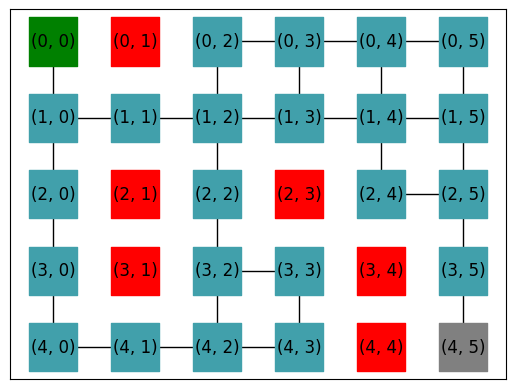

start: (0, 0) finish: (4, 5)


In [18]:
grid = [[1,-1,0,0,0,0],
        [0,0,0,0,0,0],
        [0,-1,0,-1,0,0],
        [0,-1,0,0,-1,0],
        [0,0,0,0,-1,2]]

graph = grid_to_graph(grid)
print(f'start: {graph.graph["start"]} finish: {graph.graph["finish"]}')

## Shortest Path

Shortest path: [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (4, 5)]


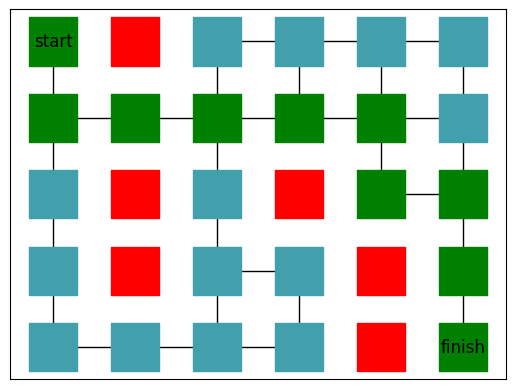

In [19]:
shortest_path = a_star(graph,graph.graph['start'],graph.graph['finish'], heuristic=manhattan)

if shortest_path != -1:
    shortest_path.reverse()
    for node in shortest_path:
        graph.nodes[node]['color'] = 'green'
    graph.graph['colors'] = [graph.nodes[node]['color'] for node in graph.nodes]
    print('Shortest path:',shortest_path)
    plot_graph(graph, coords=False)
else:
    print('Unreachable')

